In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from scipy.io import arff
data = arff.loadarff('Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data[0])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [3]:
# Decode the byte string in the 'Class' column
df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8'))

In [5]:
df['Class'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [6]:
# Select the 'Class' column and count the occurrences of each class.
class_counts = df['Class'].value_counts()

# Print the class counts.
print(class_counts)

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


In [7]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [10]:
df['Class'] = df['Class'].map({'Cammeo': 0, 'Osmancik': 1})

In [11]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


In [12]:
# Split dataset into independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50], 'max_iter': [100, 200, 300]}

In [23]:
classifier_regressor = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)
classifier_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Trac

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [24]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [25]:
print(classifier_regressor.best_score_)

0.9282488089843606


In [26]:
# Prediction
y_pred = classifier_regressor.predict(X_test)

In [28]:
# Accuracy Score
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)
print(score)

0.9349422875131165


In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       418
           1       0.95      0.93      0.94       535

    accuracy                           0.93       953
   macro avg       0.93      0.94      0.93       953
weighted avg       0.94      0.93      0.94       953



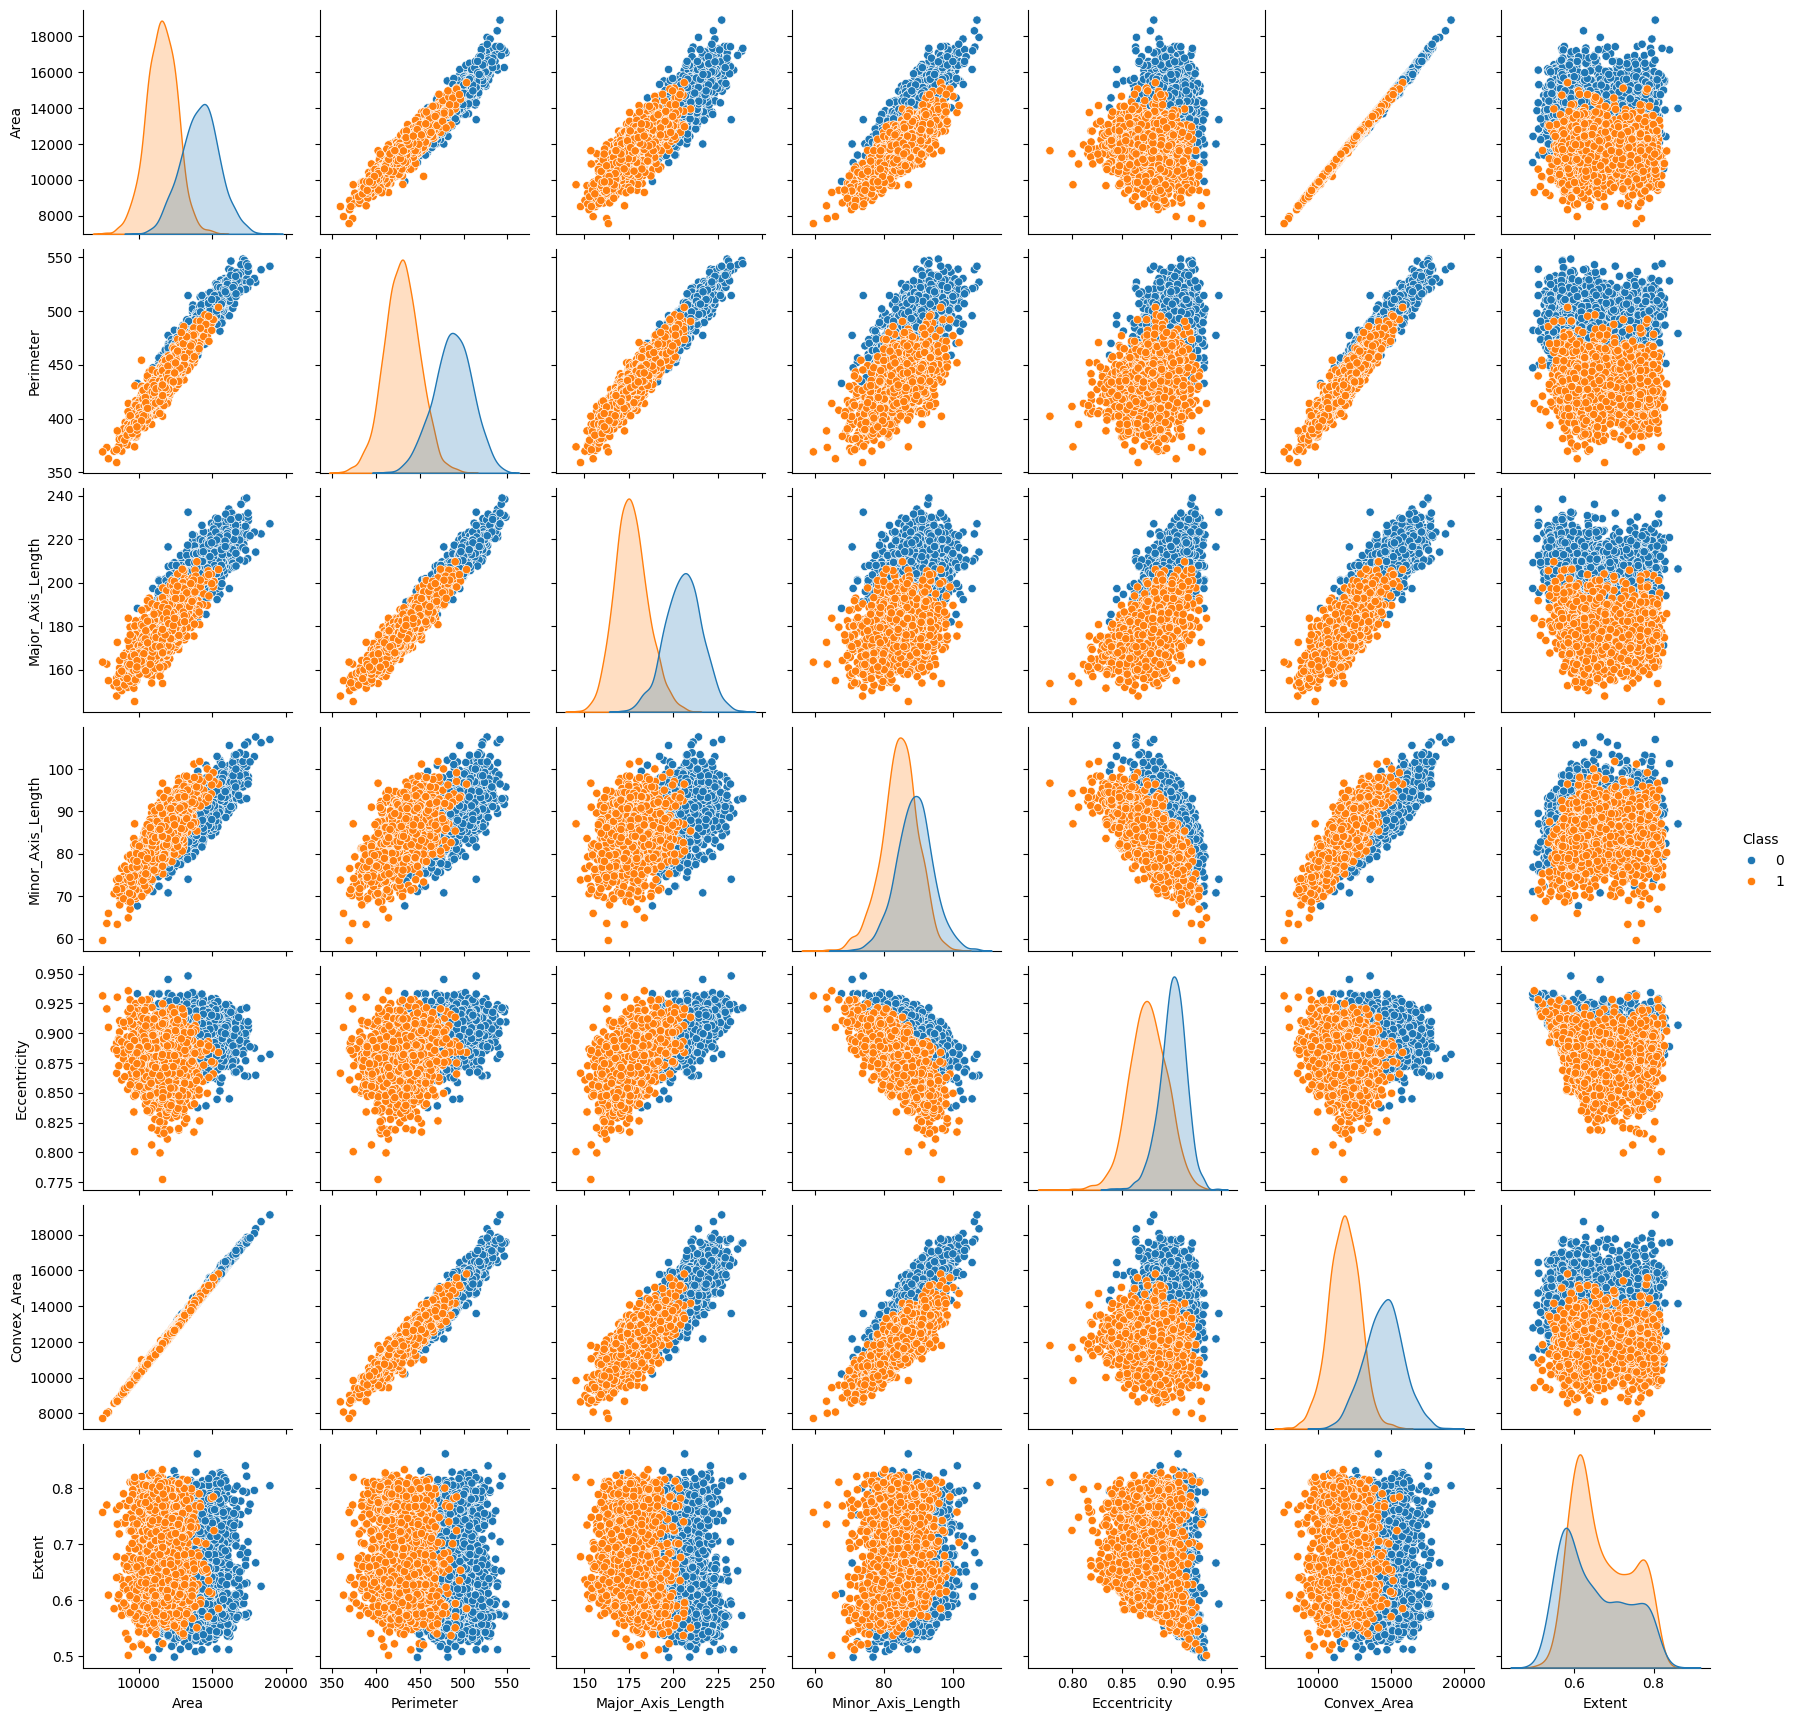

In [30]:
# EDA
sns.pairplot(df, hue='Class')

In [31]:
df.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184,-0.746400
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923,-0.806572
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562,-0.827824
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366,-0.370355
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580,-0.588916
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826,-0.750424
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000,0.117727
Class,-0.746400,-0.806572,-0.827824,-0.370355,-0.588916,-0.750424,0.117727,1.000000
